# Silver spherical NP verification

We perform verification by comparing our numerical calculations of the extinction cross-section with analytical solutions, available for spherical geometries. 

For spherical geometries the solution for the extinction cross-section provided by Mishenko (1) applies for all mediums. When the medium is a lossy medium, $k^\prime$ is the real part of the complex wave number, otherwise $k$ is a real-valued and we take $k^\prime=k$.

\begin{equation*} 
    C_\text{ext} = \frac{4\pi a^3}{k^\prime} \operatorname{Im}\left(k^2 \frac{\epsilon_p/\epsilon_m -1}{\epsilon_p/\epsilon_m -2}\right)
\end{equation*}

where $a$ is the radius of the sphere, $k$ the complex wave number ($k=k^\prime +i k^{\prime\prime}$), $\epsilon_p$ the dielectric constant of the particle, and $\epsilon_m$ the dielectric constant of the host medium.

When we apply the electrostatic approximation the simulation reduces to a sphere under a constant electric field (Figure 1).

<img src="../../reports/figures/sphere_field_8nm.png" style="width: 250px;"/> 
<br />
#### Fig 1. Spherical nanoparticle in a constant electric field. (2)

In this notebook we present the result for a silver spherical nanoparticle in a water environment. We compare the results obtained with PyGBe with the analytical solution. We consider de loses of the medium. (Complete this paragraph with info from reports.)

In [1]:
import numpy
from matplotlib import pyplot, rcParams
%matplotlib inline

import verification_helper

In [2]:
#Import simulation data
wavelength_ang, Cext = numpy.loadtxt('data/silver_sphere_R8nm_w370-400.txt', unpack=True)

In [3]:
#Compute analytical solution

#Import dielectric data

wavelength_ang_water, diel_out_re, diel_out_im = numpy.loadtxt('data/wave_water_diel_3700-4000.txt', unpack=True)

wavelength_ang_silver, diel_in_re, diel_in_im = numpy.loadtxt('data/wave_silver_diel_3700-4000.txt', unpack=True)



In [4]:
wavelength_nm = wavelength_ang/10

diel_out = diel_out_re + diel_out_im*1j
diel_in = diel_in_re + diel_in_im*1j

R = 8 #nm
Cext_an = verification_helper.Cext_analytical(R, wavelength_nm, diel_out, diel_in)

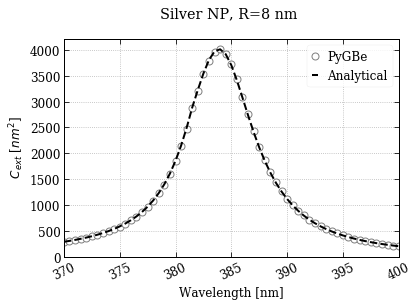

In [5]:
verification_helper.plot_cext_wave(wavelength_nm, Cext, Cext_an, ylim_s=0, ylim_e=4200,
                                   xpoints=7, title='Silver NP, R=8 nm \n', file_name='silver_NP_verification')

**The line below generates the pdf image as it shows in the paper**

In [6]:
verification_helper.plot_cext_wave(wavelength_nm, Cext, Cext_an, ylim_s=0, ylim_e=4200,
                                   xpoints=7, file_name='silver_NP_verification', paper=True)